### Objective
#### The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level. 
#### Regression Problem

In [6]:
import pandas as pd # used for dataframe manipulations
import numpy as np
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting

from sklearn.preprocessing import StandardScaler

In [7]:
# Loading DataSet
train_file='train_0OECtn8.csv'
test_file='test_1zqHu22.csv'

ld_train=pd.read_csv(train_file)
ld_test=pd.read_csv(test_file)

In [8]:
ld_train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [9]:
ld_test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [10]:
# Sanity Checking
ld_train.shape, ld_test.shape

((89197, 10), (11121, 9))

### EDA  

In [11]:
# Data Types of the features
ld_train.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

#### Insights

row_id could be removed => Unwanted column!

gender and profession should have been a numeric column, check for the reasons for it being a object column and convert it to numeric

In [12]:
# lets combine the data for data preprocessing

ld_test['engagement_score'] = np.nan

ld_train['data'] = 'train'

ld_test['data'] = 'test'

ld_test = ld_test[ld_train.columns] # reordering the columns of test dataset in the order of train dataset

ld_all = pd.concat([ld_train,ld_test],axis=0) # row wise concatenation

In [13]:
ld_all.shape, ld_train.shape, ld_test.shape

((100318, 11), (89197, 11), (11121, 11))

In [14]:
ld_all.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,data
0,1,19990,37,128,24,Male,Student,180,1000,4.33,train
1,2,5304,32,132,14,Female,Student,330,714,1.79,train
2,3,1840,12,24,19,Male,Student,180,138,4.35,train
3,4,12597,23,112,19,Male,Student,220,613,3.77,train
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13,train


In [15]:
ld_all.tail()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,data
11116,100314,26336,25,140,21,Male,Student,240,317,NaN,test
11117,100315,6772,8,100,19,Female,Student,280,628,NaN,test
11118,100316,2042,16,98,22,Male,Student,270,462,NaN,test
11119,100317,24626,8,16,33,Male,Other,280,628,NaN,test
11120,100318,967,8,74,33,Male,Working Professional,280,628,NaN,test


In [16]:
ld_all.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
data                 object
dtype: object

In [17]:
# Dropping irrelevant columns 

ld_all.drop(['row_id'],axis=1,inplace=True)
# ld_all.drop(['user_id'],axis=1,inplace=True)

In [18]:
ld_all['profession'].value_counts()

Student                 50210
Other                   30206
Working Professional    19902
Name: profession, dtype: int64

In [19]:
ld_all['engagement_score'].value_counts()

3.80    2172
3.77    2041
3.87    1894
2.70    1882
4.29    1827
        ... 
4.32      25
4.15      24
4.56      22
4.31      19
4.36      17
Name: engagement_score, Length: 229, dtype: int64

<AxesSubplot:xlabel='profession', ylabel='engagement_score'>

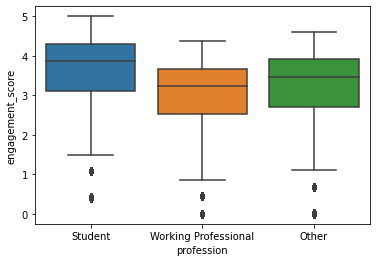

In [14]:
import seaborn as sns

sns.boxplot(y = ld_all.loc[ld_all['data']=='train', 'engagement_score'], x= ld_all.loc[ld_all['data']=='train', 'profession'])

In [15]:
# one hot encoding
k = pd.get_dummies(ld_all['profession'],prefix = 'Pro')

In [16]:
ld_all.drop(['profession'],axis=1,inplace=True) # del ld_all['profession']
ld_all = pd.concat([ld_all,k],axis=1)

In [17]:
ld_all.shape

(100318, 12)

In [18]:
ld_all

,user_id,category_id,video_id,age,gender,followers,views,engagement_score,data,Pro_Other,Pro_Student,Pro_Working Professional
0,19990,37,128,24,Male,180,1000,4.33,train,0,1,0
1,5304,32,132,14,Female,330,714,1.79,train,0,1,0
2,1840,12,24,19,Male,180,138,4.35,train,0,1,0
3,12597,23,112,19,Male,220,613,3.77,train,0,1,0
4,13626,23,112,27,Male,220,613,3.13,train,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,Male,240,317,NaN,test,0,1,0
11117,6772,8,100,19,Female,280,628,NaN,test,0,1,0
11118,2042,16,98,22,Male,270,462,NaN,test,0,1,0
11119,24626,8,16,33,Male,280,628,NaN,test,1,0,0


In [19]:
ld_all['gender'].value_counts()

Male      58774
Female    41544
Name: gender, dtype: int64

In [20]:
# one hot encoding
k = pd.get_dummies(ld_all['gender'],prefix = 'Gender')

In [21]:
ld_all.drop(['gender'],axis=1,inplace=True) # del ld_all['gender']
ld_all = pd.concat([ld_all,k],axis=1)

In [22]:
ld_all.shape

(100318, 13)

In [23]:
ld_all

,user_id,category_id,video_id,age,followers,views,engagement_score,data,Pro_Other,Pro_Student,Pro_Working Professional,Gender_Female,Gender_Male
0,19990,37,128,24,180,1000,4.33,train,0,1,0,0,1
1,5304,32,132,14,330,714,1.79,train,0,1,0,1,0
2,1840,12,24,19,180,138,4.35,train,0,1,0,0,1
3,12597,23,112,19,220,613,3.77,train,0,1,0,0,1
4,13626,23,112,27,220,613,3.13,train,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,26336,25,140,21,240,317,NaN,test,0,1,0,0,1
11117,6772,8,100,19,280,628,NaN,test,0,1,0,1,0
11118,2042,16,98,22,270,462,NaN,test,0,1,0,0,1
11119,24626,8,16,33,280,628,NaN,test,1,0,0,0,1


In [24]:
ld_all.dtypes

user_id                       int64
category_id                   int64
video_id                      int64
age                           int64
followers                     int64
views                         int64
engagement_score            float64
data                         object
Pro_Other                     uint8
Pro_Student                   uint8
Pro_Working Professional      uint8
Gender_Female                 uint8
Gender_Male                   uint8
dtype: object

In [25]:
# No missing value in Train and Test Dataset
# 11121 is of test dataset as engagement_score is target variable
ld_all.isnull().sum()

user_id                         0
category_id                     0
video_id                        0
age                             0
followers                       0
views                           0
engagement_score            11121
data                            0
Pro_Other                       0
Pro_Student                     0
Pro_Working Professional        0
Gender_Female                   0
Gender_Male                     0
dtype: int64

####  Outliers Detection

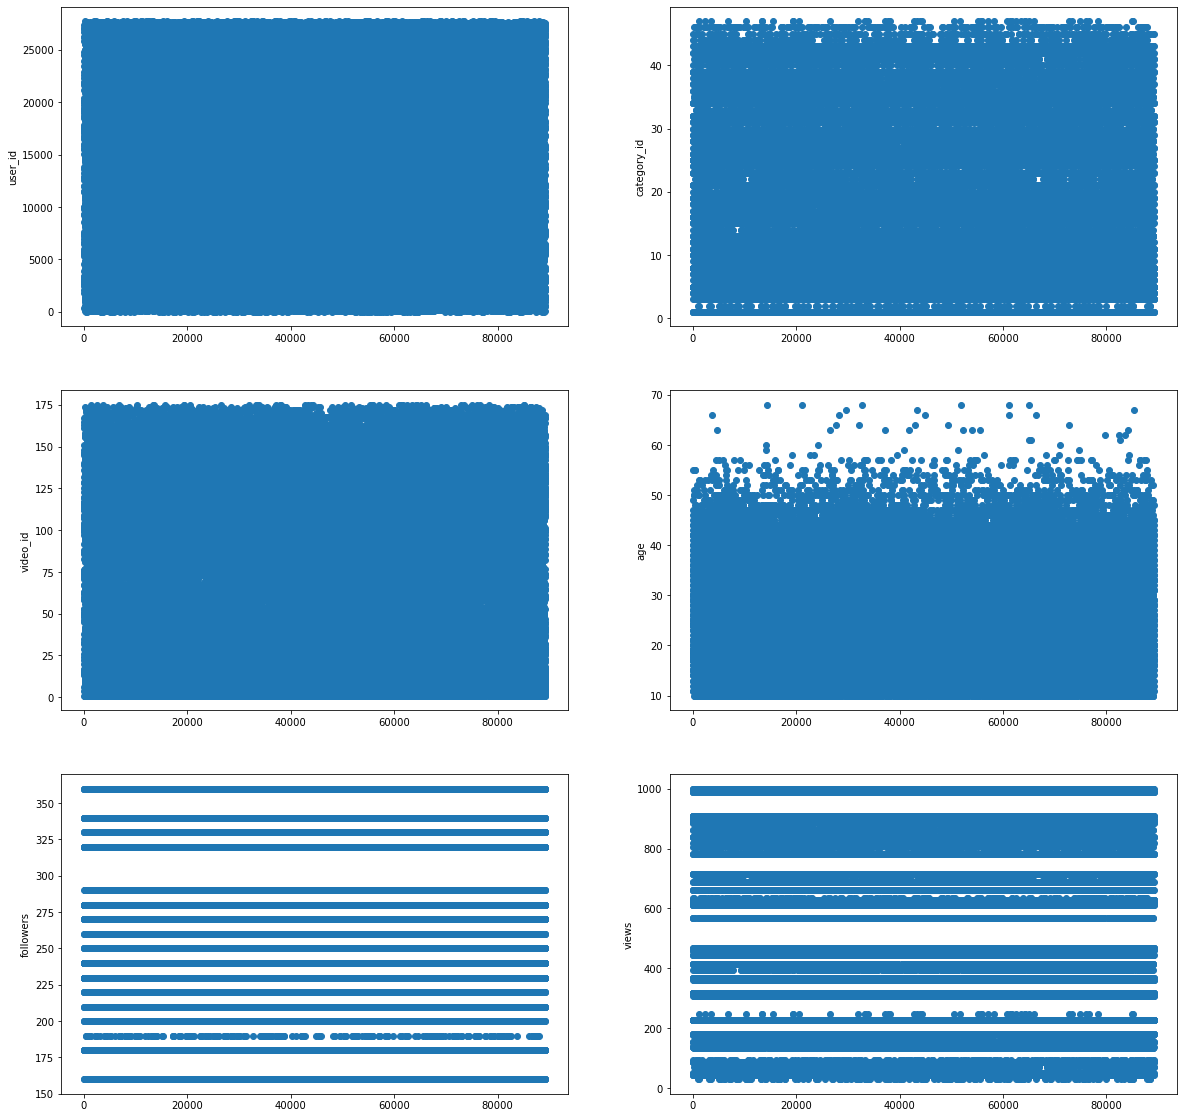

In [26]:
# Visualizing numeric columns

genuine_numeric_cols = ['user_id','category_id', 'video_id', 'age', 'followers', 'views','engagement_score']

numeric_cols = ld_all.loc[ld_all['data']=='train',genuine_numeric_cols] # selects numeric columns from train dataset

column_names = list(numeric_cols.columns)

col_index = 0

plot_rows = 3
plot_cols = 2

fig, ax = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

for row_count in range(plot_rows):
    for col_count in range(plot_cols):
        ax[row_count][col_count].scatter(y = numeric_cols[column_names[col_index]],x=numeric_cols.index)
        ax[row_count][col_count].set_ylabel(column_names[col_index])
        col_index = col_index + 1

No major outliers found

#### Finding Correlations 

In [27]:
# High corrlation between target variable and features (good thing)
# High correlation among features (bad) 

numeric_cols.corr()

,user_id,category_id,video_id,age,followers,views,engagement_score
user_id,1.000000,0.002139,0.005232,-0.000036,-0.002026,-0.001843,-0.002900
category_id,0.002139,1.000000,0.556550,-0.003152,0.056432,0.079321,-0.094288
video_id,0.005232,0.556550,1.000000,-0.005615,0.098778,-0.029448,-0.030552
age,-0.000036,-0.003152,-0.005615,1.000000,0.004623,0.011042,-0.232626
followers,-0.002026,0.056432,0.098778,0.004623,1.000000,0.360808,0.000855
views,-0.001843,0.079321,-0.029448,0.011042,0.360808,1.000000,-0.084679
engagement_score,-0.002900,-0.094288,-0.030552,-0.232626,0.000855,-0.084679,1.000000


No High correlation among features found

#### Scaling 

In [28]:
# Scaling the columns
genuine_numeric_cols = ['user_id','category_id', 'video_id', 'age', 'followers', 'views']

scaler = StandardScaler()  # instance of this object

scaler.fit(ld_all[genuine_numeric_cols]) # it will compute mean and standard deviation of every column

ld_all[genuine_numeric_cols] = scaler.transform(ld_all[genuine_numeric_cols])

In [29]:
ld_all

,user_id,category_id,video_id,age,followers,views,engagement_score,data,Pro_Other,Pro_Student,Pro_Working Professional,Gender_Female,Gender_Male
0,0.763809,1.640773,1.032179,-0.094830,-1.591931,1.881624,4.33,train,0,1,0,0,1
1,-1.070785,1.208327,1.114655,-1.211491,1.717548,0.810355,1.79,train,0,1,0,1,0
2,-1.503513,-0.521457,-1.112185,-0.653160,-1.591931,-1.347165,4.35,train,0,1,0,0,1
3,-0.159734,0.429924,0.702277,-0.653160,-0.709403,0.432040,3.77,train,0,1,0,0,1
4,-0.031190,0.429924,0.702277,0.240168,-0.709403,0.432040,3.13,train,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11116,1.556560,0.602903,1.279606,-0.429828,-0.268140,-0.676686,NaN,test,0,1,0,0,1
11117,-0.887401,-0.867414,0.454850,-0.653160,0.614388,0.488226,NaN,test,0,1,0,1,0
11118,-1.478279,-0.175500,0.413613,-0.318162,0.393756,-0.133560,NaN,test,0,1,0,0,1
11119,1.342944,-0.867414,-1.277136,0.910164,0.614388,0.488226,NaN,test,1,0,0,0,1


In [30]:
# Seggregate the train and test back 

# Train Dataset
ld_train = ld_all.loc[ld_all['data']=='train']

del ld_train['data']

In [31]:
ld_train

,user_id,category_id,video_id,age,followers,views,engagement_score,Pro_Other,Pro_Student,Pro_Working Professional,Gender_Female,Gender_Male
0,0.763809,1.640773,1.032179,-0.094830,-1.591931,1.881624,4.33,0,1,0,0,1
1,-1.070785,1.208327,1.114655,-1.211491,1.717548,0.810355,1.79,0,1,0,1,0
2,-1.503513,-0.521457,-1.112185,-0.653160,-1.591931,-1.347165,4.35,0,1,0,0,1
3,-0.159734,0.429924,0.702277,-0.653160,-0.709403,0.432040,3.77,0,1,0,0,1
4,-0.031190,0.429924,0.702277,0.240168,-0.709403,0.432040,3.13,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89192,1.264244,-0.261989,-0.947234,0.016836,1.938180,0.615579,3.91,1,0,0,0,1
89193,0.823272,0.170457,-0.637951,0.686832,-0.268140,1.477089,3.56,1,0,0,0,1
89194,-0.027568,-0.175500,0.392994,0.016836,0.393756,-0.133560,4.23,0,1,0,0,1
89195,1.369677,-0.780924,-1.235899,1.133496,-0.488772,1.203653,3.77,0,0,1,0,1


In [32]:
# Test Dataset
ld_test = ld_all.loc[ld_all['data']=='test']

ld_test.drop(['engagement_score','data'],axis=1,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
ld_test

,user_id,category_id,video_id,age,followers,views,Pro_Other,Pro_Student,Pro_Working Professional,Gender_Female,Gender_Male
0,-0.735746,-0.521457,-0.741045,-1.211491,-1.591931,-1.347165,0,1,0,0,1
1,-0.324506,1.381305,0.764134,-1.211491,-0.488772,1.282313,0,1,0,0,1
2,0.420900,-0.867414,0.661039,2.138491,0.614388,0.488226,0,0,1,1,0
3,-0.502768,-0.175500,1.217749,-0.764826,0.393756,-0.133560,0,1,0,0,1
4,0.266372,1.381305,0.372375,2.473489,-0.488772,1.282313,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11116,1.556560,0.602903,1.279606,-0.429828,-0.268140,-0.676686,0,1,0,0,1
11117,-0.887401,-0.867414,0.454850,-0.653160,0.614388,0.488226,0,1,0,1,0
11118,-1.478279,-0.175500,0.413613,-0.318162,0.393756,-0.133560,0,1,0,0,1
11119,1.342944,-0.867414,-1.277136,0.910164,0.614388,0.488226,1,0,0,0,1


In [34]:
ld_test.shape, ld_train.shape

((11121, 11), (89197, 12))

### Modeling 

In [35]:
from sklearn.model_selection import train_test_split # split the data into train and validation

In [36]:
ld_new_train, ld_val = train_test_split(ld_train, test_size=0.1, random_state = 100) 

# random_state ensures we get the exact same split all the time

In [37]:
ld_new_train.shape, ld_val.shape

((80277, 12), (8920, 12))

In [38]:
train_features = ld_new_train.drop('engagement_score',axis=1) # this contains features for train 80%

train_targets = ld_new_train['engagement_score'] # this contains the actual value for train set

val_features = ld_val.drop('engagement_score',axis=1) # this contains features for validation set 20%

val_targets = ld_val['engagement_score']  # this contains validation target

In [39]:
ld_new_train.shape, val_features.shape

((80277, 12), (8920, 11))

In [40]:
train_features.shape, train_targets.shape

((80277, 11), (80277,))

In [41]:
val_features.shape, val_targets.shape

((8920, 11), (8920,))

#### XGboost Regression 

In [3]:
import xgboost as xgb
from sklearn import ensemble
from sklearn.metrics import r2_score

In [43]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 40, alpha = 10, n_estimators = 400)

In [44]:
xg_reg.fit(train_features, train_targets)

[15:24:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, colsample_bytree=0.3, max_depth=40, n_estimators=400)

In [ ]:
val_predictions = xg_reg.predict(val_features)

In [ ]:
r2_score(val_targets, val_predictions)

In [1]:
params = {
    "n_estimators": 400,
    "max_depth": 40,
    "min_samples_split": 100,
    "learning_rate": 0.1
}

In [4]:
xgb_reg = ensemble.GradientBoostingRegressor(**params)
xgb_reg.fit(train_features, train_targets)

NameError: name 'train_features' is not defined

In [ ]:
# val_predictions = xgb_reg.predict(val_features)

In [ ]:
# r2_score(val_targets, val_predictions)

In [ ]:
test_predictions = 12xg_reg.predict(ld_test) # predict on the test features using the fitted model

In [ ]:
test_predictions

In [ ]:
df = pd.DataFrame(test_predictions)
df.to_csv("xg_score.csv")

In [45]:
print(xgb.__version__)

0.90
